# Pandas Workshop

# Part I Extract-Transform-Load (ETL)

## 1. Import Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the csv
- Preview
- Check the data types

In [2]:
df = pd.read_csv("House_Rent_Dataset.csv")
df.head()

# I will later drop these columns 
# Posted on, Point of Contact

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [3]:
df.shape

(4746, 12)

In [4]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [5]:
df.info()

# mindful of type "obeject" because ML models cannot use them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4746 non-null   int64  
 3   Size               4746 non-null   int64  
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4739 non-null   float64
 11  Point of Contact   4746 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 445.1+ KB


# Part II. Exploratory Data Analysis (EDA)
- use describe()
- plot some countplot, distplot, scatterplot, boxplot
- try to tell me which features are promising to predict rent
- try to use masking (as a practice)
- try 'df['City'].value_counts()'
- try '.unique()'
- try 'sns.pairplot(df)' ; this will print all possible plots which take timel if your Pc is sllow,, don't run
- try 'sns.heatmap(df.corr(), annot =True)' but remiind that it only does correlation for continuous features/labels
- try 'plotly' and try 'sunburst' - sankey diagram
- try to group size into very small (0), 3 , very larger(5)
    - can use median as the middle pivot
    - can use median () - std() as the pivot between 0 an 1
- try to drop some rows, having abnormal number like Rent
    - df.drop([indexes],axis=0,inplace=True)
    - axis = 0 means row, axis = 1 means columns
    - e.g., indexes ==> [5,33,22]
- try to look at the row - df.iloc['rownum']

** Last: for those who finished , share yor 3 top features you think is for 
Size,BHK,


In [6]:
#gives you a one command easy statisical summary
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4739.000000
mean,2.083860,3.499345e+04,967.490729,1.967293
std,0.832256,7.810641e+04,634.202328,0.884405
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [7]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [8]:
#converting Furnishing Status
df['Furnishing Status'].unique()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Furnishing Status'] = le.fit_transform(df['Furnishing Status'])
le.inverse_transform(np.array([0,1,2]))
df['Furnishing Status'].unique()

array([2, 1, 0])

In [9]:
#you need to convert this to intergers for machine learning
#1. label encoding
#2. one-hot encoding

#since
#pd.get_dummies

#last time, the

#### Note 1: Rent is too high, must delete that row

In [10]:
#Drop some rows, having abnormal number like Rent
df[df['Rent']>1000000]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1001,2022-06-01,4,1200000,5000,4 out of 15,Carpet Area,Juhu,Mumbai,1,Bachelors/Family,4.0,Contact Agent
1837,2022-06-08,3,3500000,2500,4 out of 4,Carpet Area,Marathahalli,Bangalore,1,Bachelors,3.0,Contact Agent


In [11]:
np.where(df['Rent'] > 1000000)[0]

array([1001, 1837], dtype=int64)

In [12]:
df.iloc[827]
#now you have to ask yourself, which ONE is wrong entry?
#relies on domain knowledge - so as a data scientist, you must know your business...

#whatever, i gonna delete 1001, 1837

Posted On                       2022-05-18
BHK                                      4
Rent                               1000000
Size                                  3064
Floor                         18 out of 45
Area Type                      Carpet Area
Area Locality        Raheja Artesia, Worli
City                                Mumbai
Furnishing Status                        1
Tenant Preferred                    Family
Bathroom                               4.0
Point of Contact             Contact Agent
Name: 827, dtype: object

In [13]:
(np.where(df['Rent']>1000000)[0]).tolist()
#np.where return indexes

[1001, 1837]

In [14]:
# to delete
# format: df.drop([indexes], axis=0, inplace=True
# axis = 0 means row, axis = 1 means columns
df.drop((np.where(df['Rent']>1000000)[0]).tolist(), axis=0, inplace=True)

In [15]:
df.shape

(4744, 12)

#### 2.1 Univariate Analysis
- look at oen variavle
- main tools - countplot and displot
- countplot for discrete features
- displot for continuous features

<AxesSubplot:xlabel='Furnishing Status', ylabel='count'>

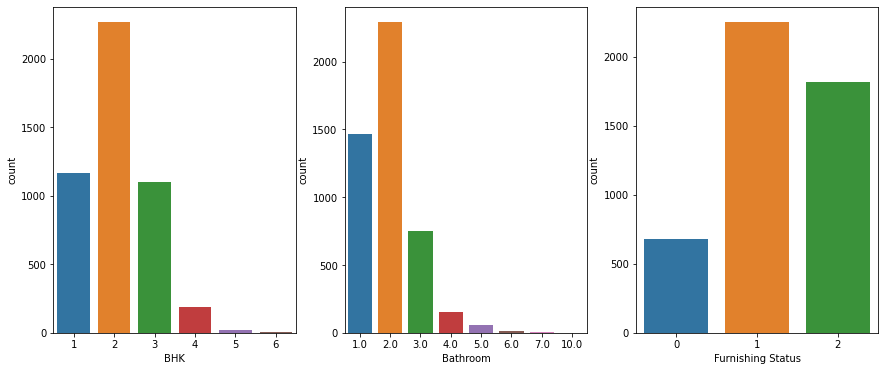

In [16]:
# Countplot or distplot ?

#1. we want to
#2. we want to

plt.figure(figsize=(20, 6))
plt.subplot(1, 4, 1)
sns.countplot(data=df,x='BHK')
plt.subplot(1, 4, 2)
sns.countplot(data=df,x='Bathroom')
plt.subplot(1, 4, 3)
sns.countplot(data=df,x='Furnishing Status')

In [17]:
df['Rent'].min(),df['Rent'].max(),df['Rent'].mean(),df['Rent'].median(),df['Rent'].std()

(1200, 1000000, 34017.47892074199, 16000.0, 57312.37814405427)

c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python3.10.4\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rent', ylabel='Density'>

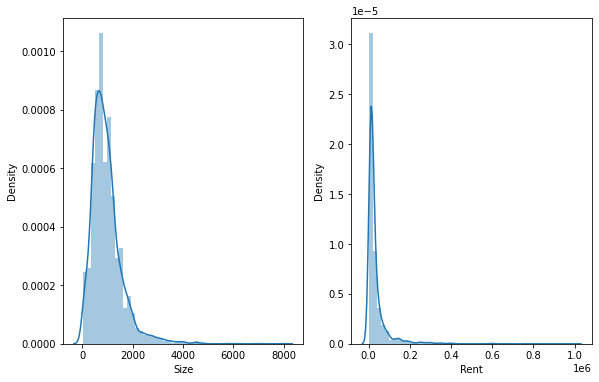

In [19]:
#let's displot 
#in this case Rent, theorentically can have 7500.2
#so Rent is considered Continuous
plt.figure(figsize=(25, 6))
plt.subplot(1, 5, 1)
sns.distplot(df['Size'])
plt.subplot(1, 5, 2)
sns.distplot(df['Rent'])


#### 2.2 Multivariate analysis
- look at two featuress/labels at the same time
- e.g., see how bathroomms affect Rent -> bivaraint analysis
- e.g., see hwo size affect Rent
- usually, y is label and x is any giben feature
- Goal: which factor/features are somwhow related tomy label, i.e., Rent
- boxplot : for discrete vs continuous features
- scatterplot : for continuous vs continuous features

In [20]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [21]:
#if i want to be see whether bathroom is related to Rent
#which plot to use?
df['Bathroom'].unique()
#theoretically, there is no 0.1 bathroom, so bathroom is doscrete
#since Rent is discrete
#so we use boxplot


array([ 2.,  1., nan,  3.,  5.,  4.,  6.,  7., 10.])

<AxesSubplot:xlabel='Bathroom', ylabel='Rent'>

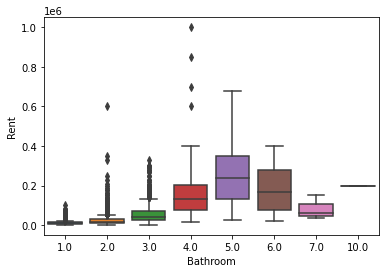

In [22]:
#for seasoned padawan, try boxenplot
# sns.boxenplot(x = df['Bathroom'], y= df['Rent'])
sns.boxplot(x = df['Bathroom'], y= df['Rent'])

#is there any relation between bathroom and Rent
#Note 2: Bathroom is good features

In [23]:
df['City'].value_counts()

Mumbai       971
Chennai      891
Bangalore    885
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

<AxesSubplot:xlabel='City', ylabel='Rent'>

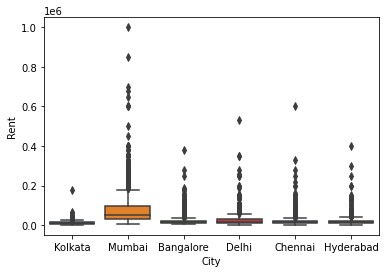

In [24]:
# I am interested whether city affects Rent
sns.boxplot(x = df['City'], y= df['Rent'])

#Note2 : if you want to use City as feature you may want to convert 
#Mumbai and non-Mumbai

<AxesSubplot:xlabel='Size', ylabel='Rent'>

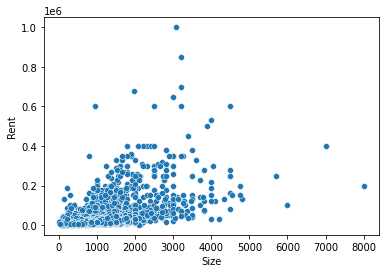

In [25]:
#thereotically, size can be decimals, so size is continuous
#so I want to know wheteher size affects Rent  
#scatterplot or boxplot?
sns.scatterplot(x = df['Size'], y=df['Rent'])

<AxesSubplot:>

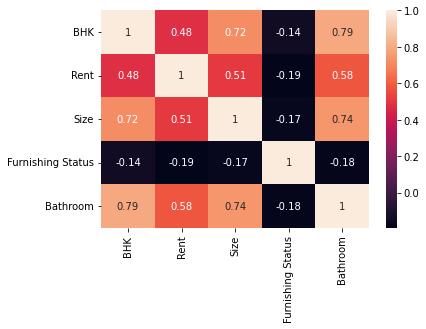

In [26]:
#since this is tricky, maybe let's try heatmap
sns.heatmap(df.corr(), annot =True)
#note that this is only between continuous values

(966.3176644182125, 850.0, 631.2346642955634)

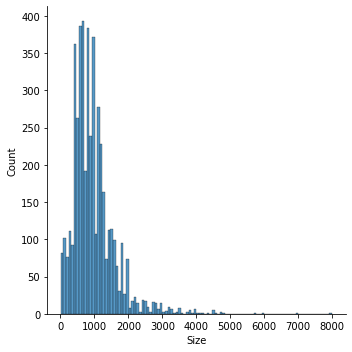

In [27]:
sns.displot(df.Size)
df['Size'].mean(),df['Size'].median(),df['Size'].std()

In [28]:
# one more thing you have to be care ful
# if two features (NOT labels) have very high correlation, beware
# features MUST NOT have high correlational, we always assume they are independent
# if you have two very correlated features, you will fool the model

In [29]:
#summary: size, bathroom, bhk - let's say these are best three
#but beware: chaky did not comprehensively look at the data

In [30]:
#let's try create new column called categorical_size
#which 1 mean small, 2 means medium, 3 mean big
#yhis is just for exercise
#it's very common in data science so I want to practice

In [31]:
firstpivot = df.Size.median() - df.Size.std()
firstpivot
#the reason why I minus std is basically following basic distribtuion rule
#the reason why I use median() is because my dist is not normal

218.76533570443655

In [32]:
secodnpivot = df.Size.median() + df.Size.std()
secodnpivot

1481.2346642955636

In [33]:
#So I want to make three groups
#Group 1: < 218.75
cond1 = df.Size < firstpivot #basically a list of True and False (can be used to select indexes) 

#Group 2: 218.76 to 1481.234
cond2 = (df.Size >= firstpivot) & (df.Size <= secodnpivot)

#Group 3: > 1481.234
cond3 = df.Size > secodnpivot


In [34]:
#set all row meeting 
#cond1 to 1 
#cond2 to 2
#cond3 to 3
#format: df.col[cond1] = 1
# df.cat_size = 1 cannot use because u don't have distribution yet

df['cat_size'] = 1

In [35]:
# df.cat_size[cond1] = 1
# df.cat_size[cond2] = 2
# df.cat_size[cond3] = 3

#format : df.loc[masking indexes, column] 
df.loc[cond1, 'cat_size'] = 1
df.loc[cond2, 'cat_size'] = 2
df.loc[cond3, 'cat_size'] = 3

In [36]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,cat_size
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,2,Bachelors/Family,2.0,Contact Owner,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,1,Bachelors/Family,1.0,Contact Owner,2
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,1,Bachelors/Family,1.0,Contact Owner,2
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,2,Bachelors/Family,1.0,Contact Owner,2
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,2,Bachelors,1.0,Contact Owner,2


<AxesSubplot:xlabel='cat_size', ylabel='Rent'>

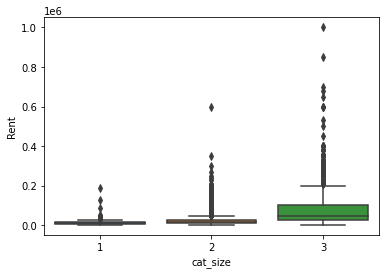

In [37]:
#try to plot and see whether categorical size has an effect with Rent

#which plot i use: boxplot or scatterplot?

sns.boxplot(x = df['cat_size'], y = df['Rent'])

#the concept in which we create new features using existing features
#are called "feature engineering"

#maybe the idea is try to separate the category even more
#very small, small, medium, big, very big

#conclusion: i hope that using the continuous Size, can be better
#if my model is smart

In [38]:
#you need to convert this to integers for machine learning
#1. label encoding 
#2. one-hot encoding

#since we have three categories, we gonna use one-hot encoding
#pd.get_dummies
#   it will take the value, and use it as column

#last time, the command you use is LabelEncoder()

In [39]:
#conclusion of EDA:
#1. we remove some outliers from Rent
#2. we found bathroom, size, and bhk to be promising features
#3. we learn how to group and perform feature engineering

# Part III Feature Extraction / Selection

- you have to now select your X and y
- once you select, please do train_test_split

Note : the reason why I do features extraction before preprocessing , is to preventing data leakage

In [40]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact', 'cat_size'],
      dtype='object')

In [41]:
X =  df[['Size','Bathroom','BHK']] #if not, you will NOT get a shapre of (m,n)
y = df[['Rent']] #shape must be (m,)

#this is to make sure my X is shape(m,n)
#where m is number of rows
#and n is the number of columns
assert X.shape[0] > 0
assert X.shape[1] > 0

assert y.shape[0] > 0
# assert y.ndim == 1

from sklearn.model_selection import train_test_split

#random state: you can choose wether number you wanr
#but this will ensure toda or tomorrow, you will ALWAYS get the same split
#for the same random state
#so we can compare our results

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=999)

In [42]:
#Please check the shape of X_train,X_test,y_train,y_test 
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((3320, 3), (1424, 3), (3320, 1), (1424, 1))

In [43]:
#one last thing to do, e.g., ensure no datatype "object"
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3320 entries, 4292 to 4446
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Size      3320 non-null   int64  
 1   Bathroom  3316 non-null   float64
 2   BHK       3320 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 103.8 KB


In [44]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3320 entries, 4292 to 4446
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Rent    3320 non-null   int64
dtypes: int64(1)
memory usage: 51.9 KB


# Part IV Cleaning/Preprocessing
- We always preprocess AFTER spliting, to prevent data leakage
1. Fill the missing values if any
2. Standardize the data

There are two ways:
1. Fill - Standardsize
2. Standardsize - Fill - Standardsize

--> If you fill with mean(), these two ways are the same
--> If you fill with median(), it's best to do Fill - Standardsize

## 4.1 Fill

In [45]:
X_train.isna().sum() 
#isna or isnull is the same

Size        0
Bathroom    4
BHK         0
dtype: int64

In [46]:
X_test.isna().sum()

Size        0
Bathroom    3
BHK         0
dtype: int64

In [47]:
#to fix the bathroom
#1.plot the distribution / count
X_train['Bathroom'].value_counts()
#2. show the median or the mean
#2. show the majority if discrete values
    #actually, youcan fill such that the ratio is maintained
#3. fillna
X_train['Bathroom'].fillna(2.0,inplace=True)

In [48]:
X_train['Bathroom'].isna().sum()

0

In [49]:
#you have fillna for test
#what to fill???
#you fill the testing set with the statistics of the training set
X_test['Bathroom'].fillna(2.0,inplace=True)

In [50]:
X_test['Bathroom'].isna().sum()

0

In [51]:
# print("Before Bathroom Train Set : ", X_train['Bathroom'].isna().sum())
# print("Before Bathroom Test set : ", X_test['Bathroom'].isna().sum())

# X_train['Bathroom'].fillna(X_train['Bathroom'].median(), inplace=True)
# X_test['Bathroom'].fillna(X_train['Bathroom'].median(), inplace=True)

# print("After Bathroom Train Set : ", X_train['Bathroom'].isna().sum())
# print("After Bathroom Test set : ", X_test['Bathroom'].isna().sum())

# assert X_train['Bathroom'].isna().sum() == 0
# assert X_test['Bathroom'].isna().sum() == 0

## 4.2 Standardize Data

In [52]:
from sklearn.preprocessing import StandardScaler
#1. cretate the object
sc = StandardScaler()
#2. fit and transform the training set
X_train = sc.fit_transform(X_train)
#3. transform the test set
X_test = sc.transform(X_test)

y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

In [53]:
#checking Features mean is 0?
X_train[:,0].mean(),X_train[:,1].mean(),X_train[:,2].mean()

(7.517413733004072e-17, -1.1128982608290727e-16, -8.614260576609648e-17)

In [54]:
X_test[:,0].mean(),X_test[:,1].mean(),X_test[:,2].mean()


(0.03217257350036948, 0.015255842070368867, 0.031929300406796514)